<a href="https://colab.research.google.com/github/SamuelLegesseVIT/eda/blob/main/EDA_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Load Dataset and Basic Exploration
import pandas as pd

data = pd.read_csv("VerbAgg.csv")

print(f"Dimensions: {data.shape}")
data.info()
print(data.describe(include='all'))

data.head()

Dimensions: (7584, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  7584 non-null   int64 
 1   Anger     7584 non-null   int64 
 2   Gender    7584 non-null   object
 3   item      7584 non-null   object
 4   resp      7584 non-null   object
 5   id        7584 non-null   int64 
 6   btype     7584 non-null   object
 7   situ      7584 non-null   object
 8   mode      7584 non-null   object
 9   r2        7584 non-null   object
dtypes: int64(3), object(7)
memory usage: 592.6+ KB
           rownames        Anger Gender         item  resp         id  btype  \
count   7584.000000  7584.000000   7584         7584  7584  7584.0000   7584   
unique          NaN          NaN      2           24     3        NaN      3   
top             NaN          NaN      F  S1WantCurse    no        NaN  curse   
freq            NaN          NaN   5832   

,rownames,Anger,Gender,item,resp,id,btype,situ,mode,r2
0,1,20,M,S1WantCurse,no,1,curse,other,want,N
1,2,11,M,S1WantCurse,no,2,curse,other,want,N
2,3,17,F,S1WantCurse,perhaps,3,curse,other,want,Y
3,4,21,F,S1WantCurse,perhaps,4,curse,other,want,Y
4,5,17,F,S1WantCurse,perhaps,5,curse,other,want,Y


In [30]:
# Data Transformation
data = data.drop_duplicates()

data['resp'] = data['resp'].replace({'perhaps': 1, 'no': 0, 'yes': 2})

data['Anger_bin'] = pd.cut(data['Anger'], bins=[0, 10, 20, 30], labels=['low', 'medium', 'high'])

data = data.fillna(data.mean(numeric_only=True))

<ipython-input-30-879066d75726>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['resp'] = data['resp'].replace({'perhaps': 1, 'no': 0, 'yes': 2})


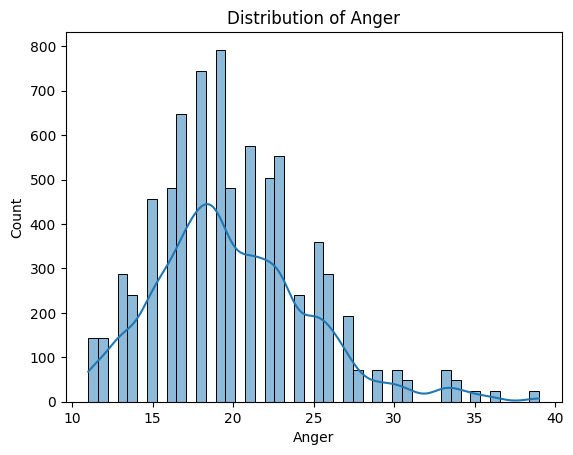

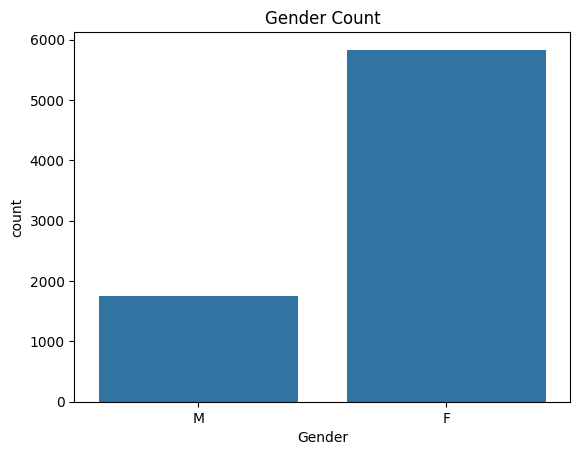

In [31]:
# Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Anger'
sns.histplot(data['Anger'], kde=True)
plt.title("Distribution of Anger")
plt.show()

# Count of Gender
sns.countplot(x='Gender', data=data)
plt.title("Gender Count")
plt.show()

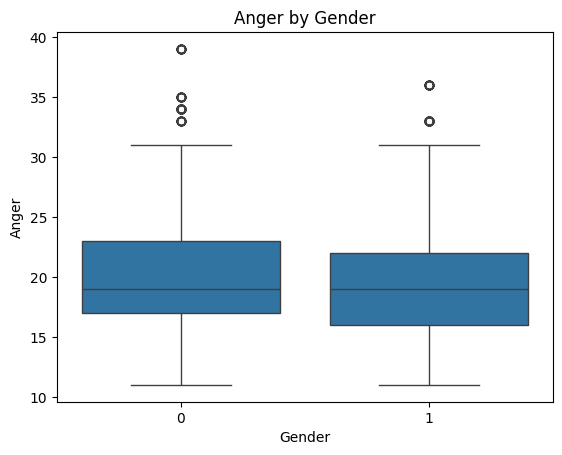

ValueError: could not convert string to float: 'medium'

In [38]:
# Bivariate Analysis

# Relationship between 'Anger' and 'Gender'
sns.boxplot(x='Gender', y='Anger', data=data)
plt.title("Anger by Gender")
plt.show()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode each non-numeric column
en_data = data
for column in ['Gender', 'item', 'resp', 'btype', 'situ', 'mode', 'r2']:
    en_data[column] = label_encoder.fit_transform(en_data[column])

en_data = en_data.drop(columns=['rownames'])

# Correlation heatmap
corr_matrix = en_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

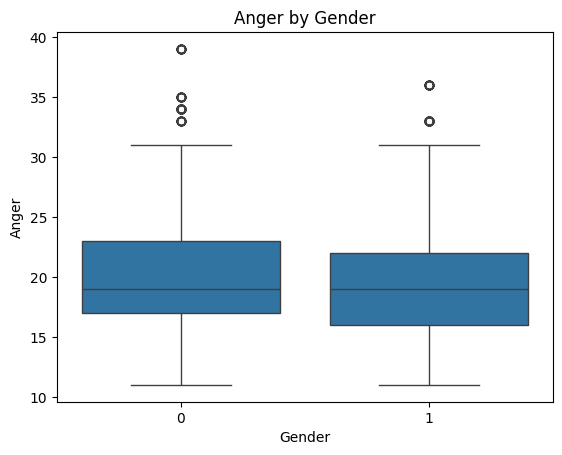

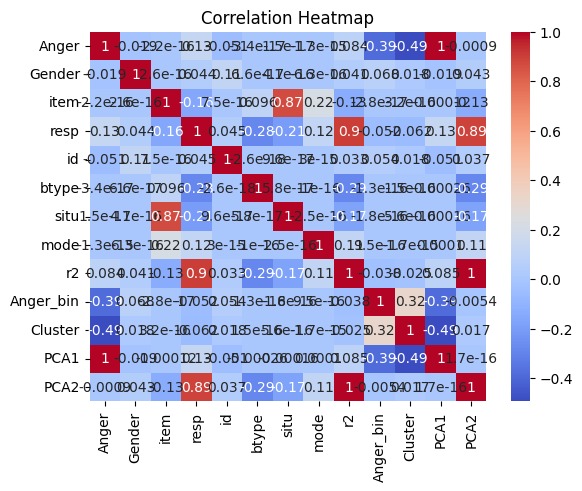

In [39]:
# Bivariate Analysis

# Relationship between 'Anger' and 'Gender'
sns.boxplot(x='Gender', y='Anger', data=data)
plt.title("Anger by Gender")
plt.show()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode each non-numeric column
en_data = data
for column in ['Gender', 'item', 'resp', 'btype', 'situ', 'mode', 'r2', 'Anger_bin']: # Include 'Anger_bin' here
    en_data[column] = label_encoder.fit_transform(en_data[column])

en_data = en_data.drop(columns=['rownames'])

# Correlation heatmap
corr_matrix = en_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

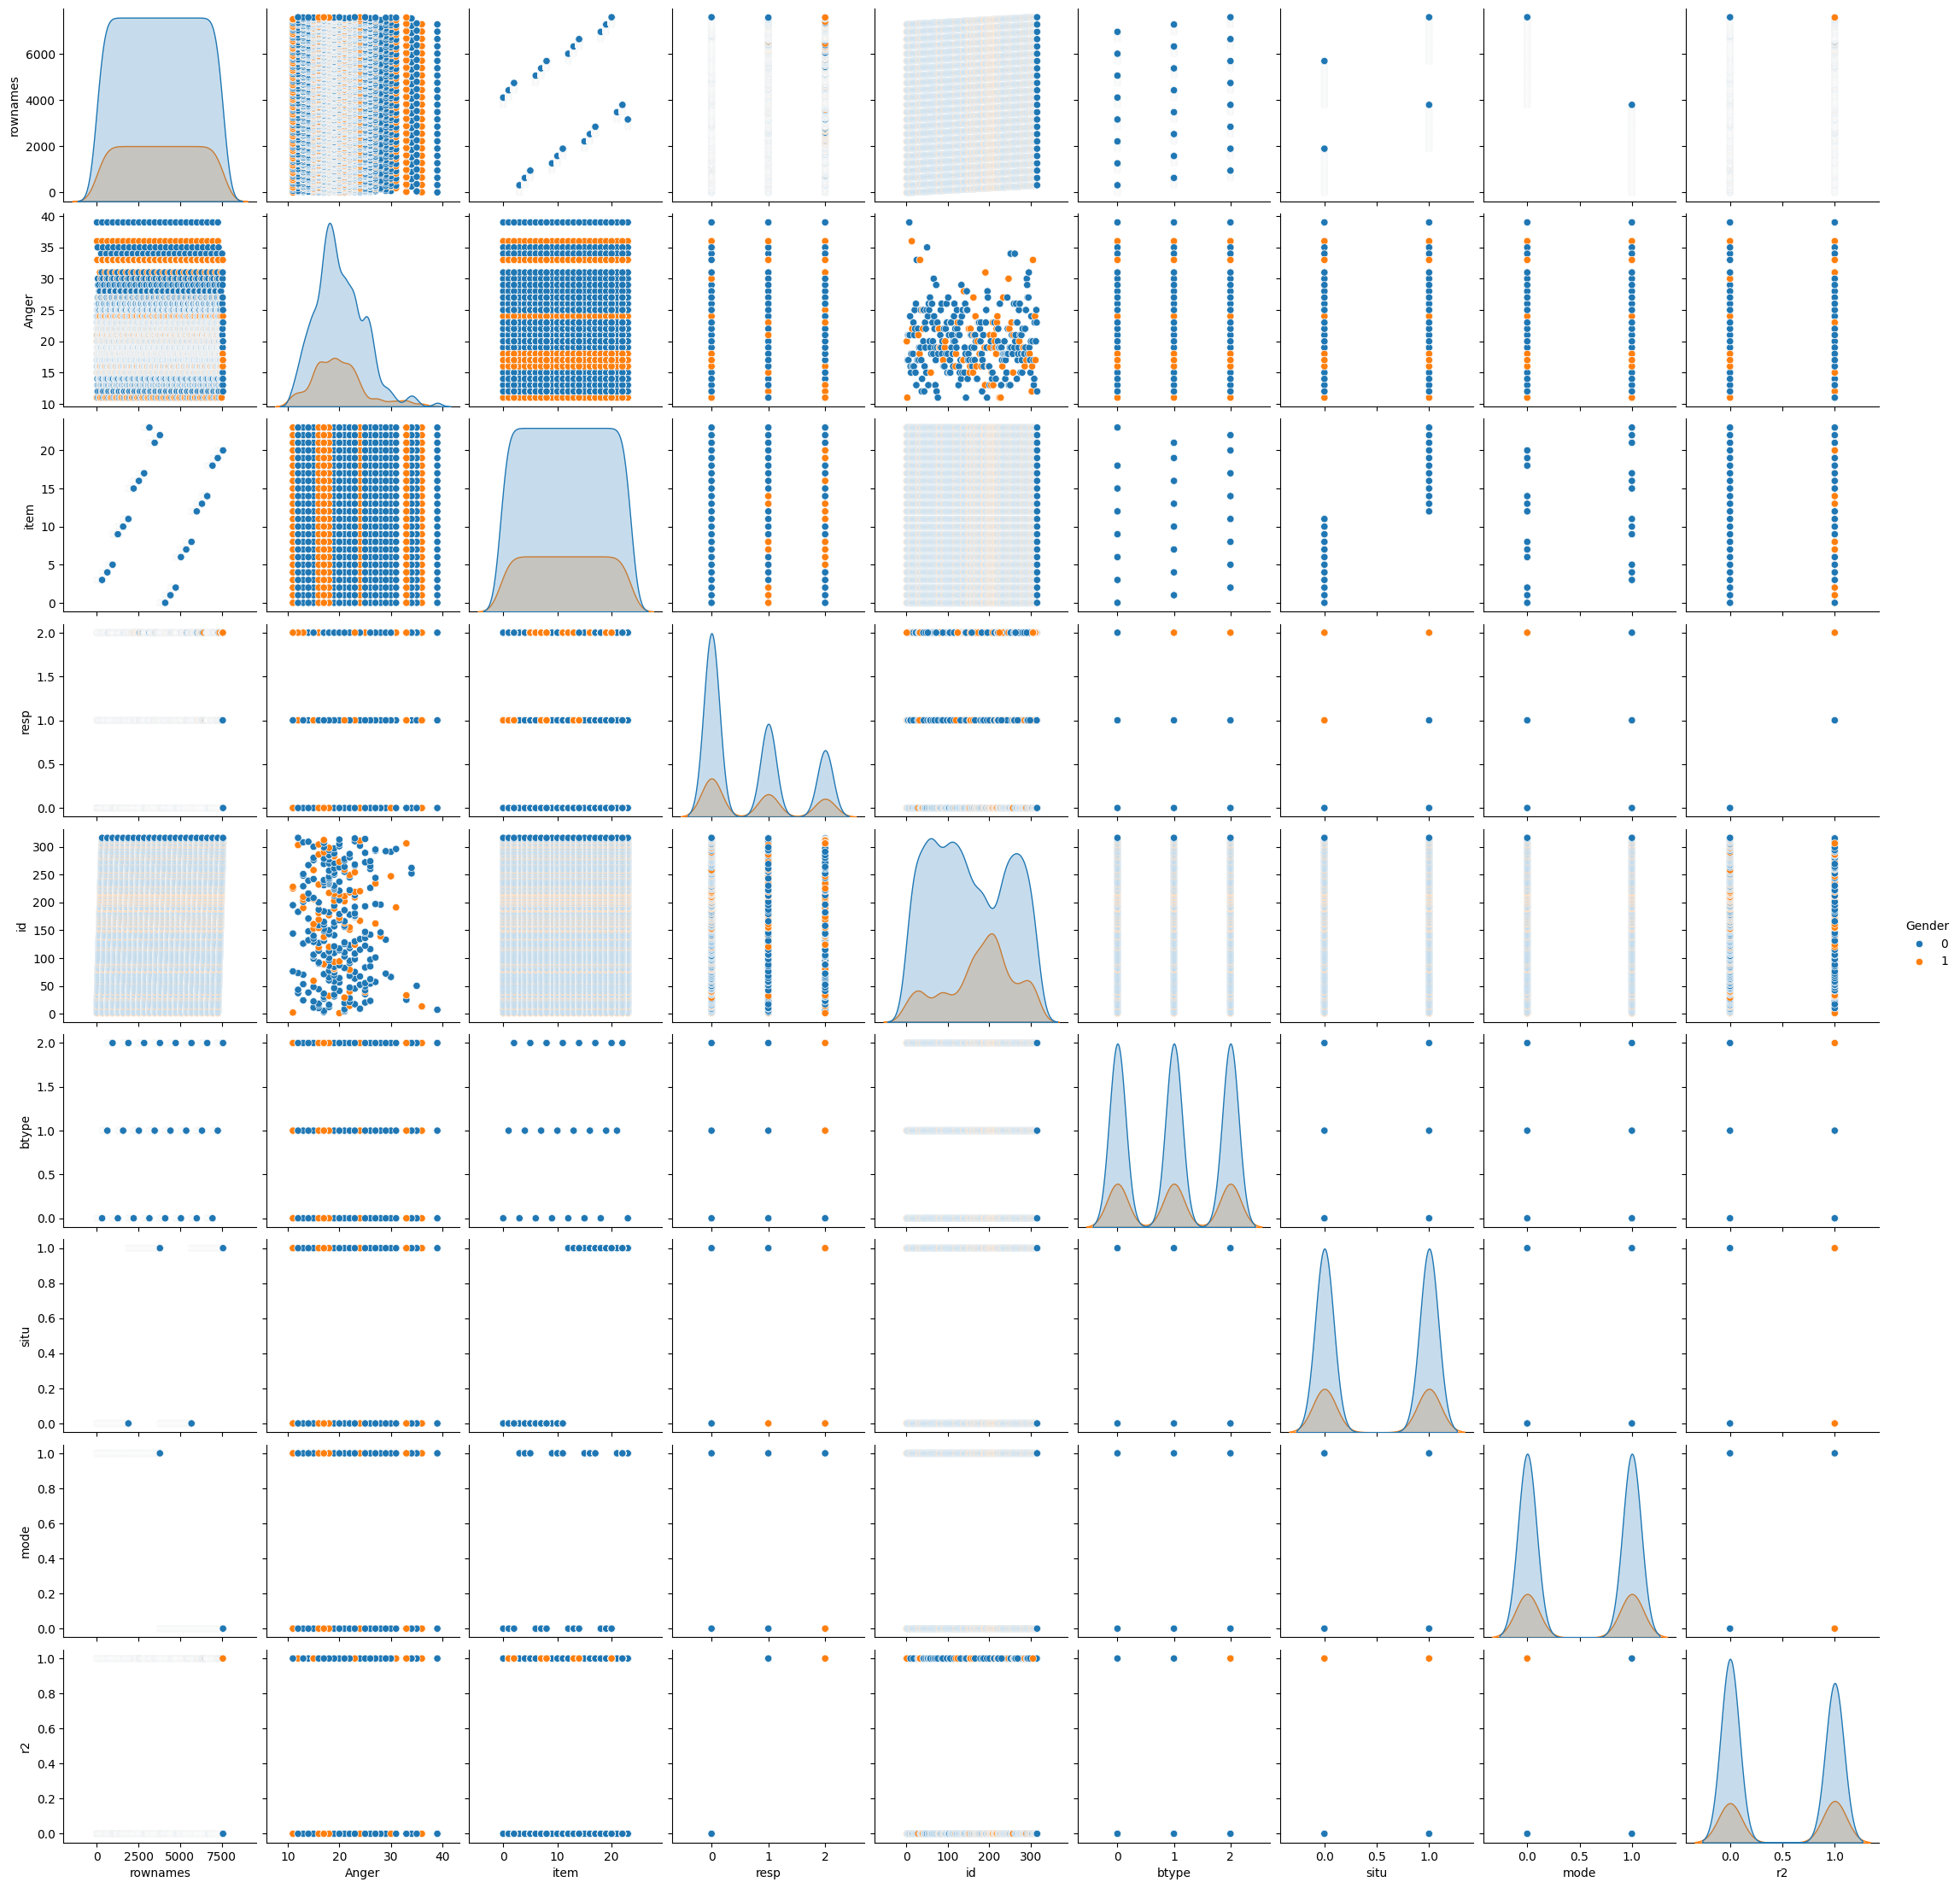

In [33]:
# Multivariate Analysis

# Pairplot for numerical features
sns.pairplot(data, hue='Gender')
plt.show()

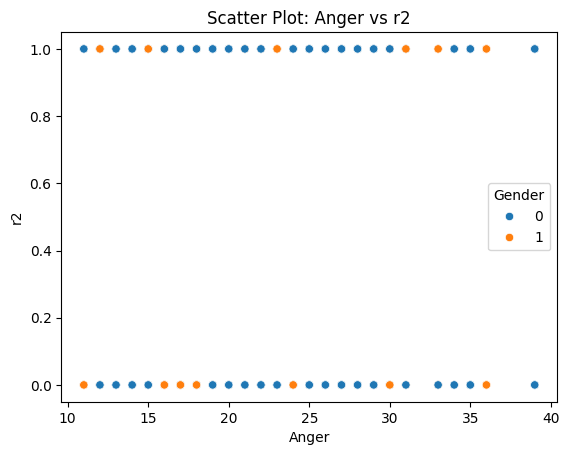

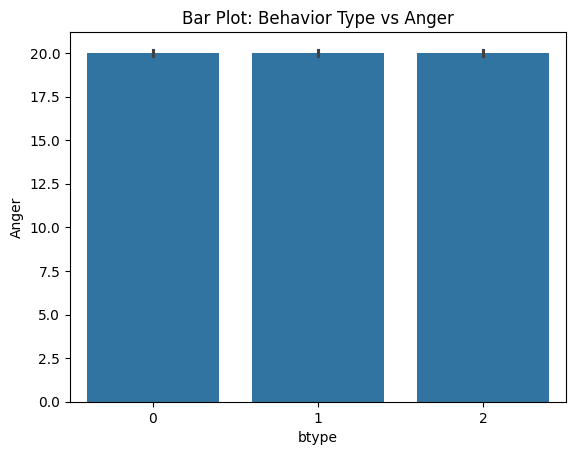

In [24]:
# Scatter plot for 'Anger' and 'r2'
sns.scatterplot(x='Anger', y='r2', hue='Gender', data=data)
plt.title("Scatter Plot: Anger vs r2")
plt.show()

# Bar plot for categorical variables
sns.barplot(x='btype', y='Anger', data=data)
plt.title("Bar Plot: Behavior Type vs Anger")
plt.show()

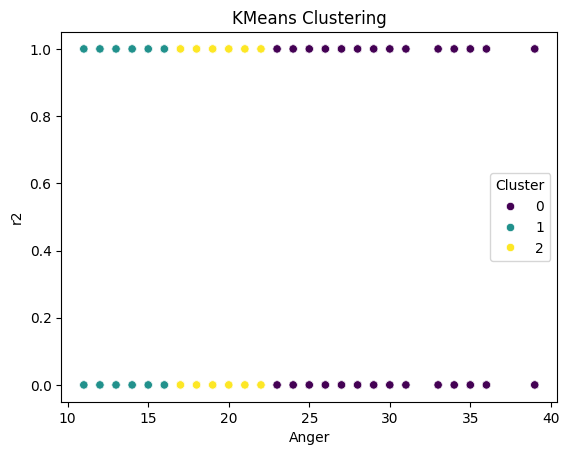

In [34]:
# Kmeans Clustering
from sklearn.cluster import KMeans

features = data[['Anger', 'r2']]

kmeans = KMeans(n_clusters=3, random_state=0).fit(features)

data['Cluster'] = kmeans.labels_

sns.scatterplot(x='Anger', y='r2', hue='Cluster', data=data, palette='viridis')
plt.title("KMeans Clustering")
plt.show()

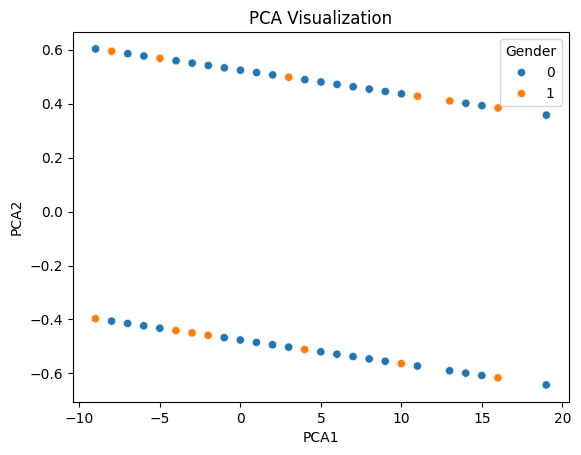

In [36]:
# PCA

from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[['Anger', 'r2']])
data['PCA1'], data['PCA2'] = pca_result[:, 0], pca_result[:, 1]

# Visualize PCA
sns.scatterplot(x='PCA1', y='PCA2', hue='Gender', data=data)
plt.title("PCA Visualization")
plt.show()

In [37]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing data
X = data[['Anger', 'r2']]
y = data['resp']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.11410419335517827
R-squared: 0.8211040299123291
